# Caso Ecommerce SK Learn

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [42]:
df = pd.read_csv('Ecommerce.csv')

In [43]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [44]:
df.columns=['Email', 'Direccion', 'Avatar', 'Duracion promedio de la sesion', 'Tiempo en la App',
       'Tiempo en el sitio Web', 'Duracion de la membresia', 'Monto anual gastado']

#### Breve análisis exploratorio

In [45]:
df.head()

,Email,Direccion,Avatar,Duracion promedio de la sesion,Tiempo en la App,Tiempo en el sitio Web,Duracion de la membresia,Monto anual gastado
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [46]:
df.shape

(500, 8)

In [57]:
df.isnull().sum()

Email                             0
Direccion                         0
Avatar                            0
Duracion promedio de la sesion    0
Tiempo en la App                  0
Tiempo en el sitio Web            0
Duracion de la membresia          0
Monto anual gastado               0
dtype: int64

#### Análisis visual

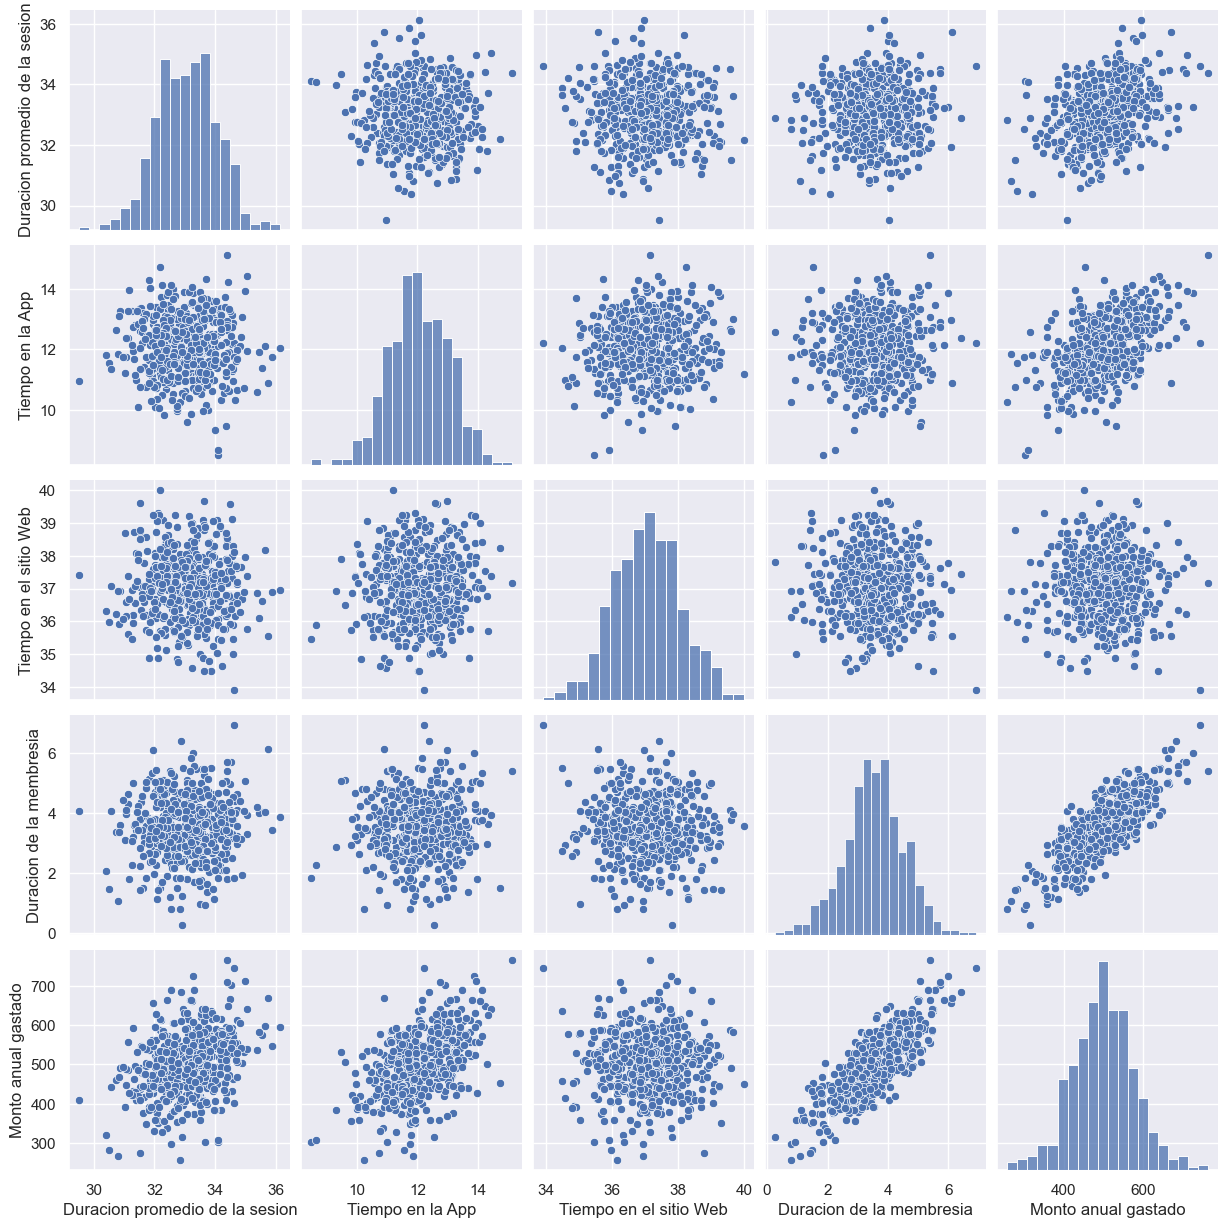

In [47]:
sns.pairplot(data=df)

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_5948\1812517500.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( df.corr(), annot=True, cmap='coolwarm')


<Axes: >

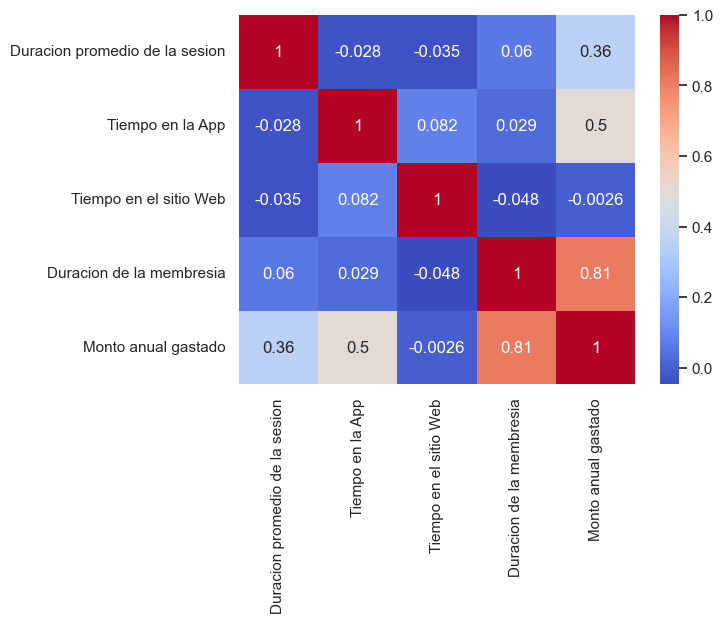

In [95]:
sns.heatmap( df.corr(), annot=True, cmap='coolwarm')

### Hipótesis de Trabajo N°1

Se va a establecer la hipotesis de que existe una relación lineal en el monto gastado anual y la duracion de la membresia.

#### Formulación del Modelo

In [62]:
df_m = df[['Duracion de la membresia','Monto anual gastado']]
X=df_m[['Duracion de la membresia']]
y=df_m[['Monto anual gastado']]
df_m.head()

,Duracion de la membresia,Monto anual gastado
0,4.082621,587.951054
1,2.664034,392.204933
2,4.104543,487.547505
3,3.120179,581.852344
4,4.446308,599.406092


In [63]:
X.head(2)

,Duracion de la membresia
0,4.082621
1,2.664034


### Validación Cruzada

In [64]:
import sklearn

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
print(X_train.shape)

(400, 1)


In [68]:
print(X_test.shape)

(100, 1)


### Entrenamiento del modelo lineal

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [71]:
# coeficientes ajustados
lm.coef_

array([[64.64010065]])

In [72]:
# intercepto 
lm.intercept_

array([271.3521128])

In [80]:
# monto anual gastado = a? + b? * duracion membresia
duracion_membresia=4

monto_anual= 271.3521128+64.64010065*duracion_membresia

In [81]:
monto_anual

529.9125154

#### Haciendo algunas predicciones

In [77]:
# predicciones sobre un valor
p1=[[4]]
lm.predict(p1)

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[529.91251542]])

In [82]:
y_pred=lm.predict(X_test)

In [85]:
y_pred[:5]

array([[493.36239897],
       [520.31855413],
       [545.31600502],
       [461.48520003],
       [492.99396212]])

In [86]:
y_test[:5]

,Monto anual gastado
361,401.033135
73,534.777188
374,418.602742
155,503.978379
104,410.069611


#### Graficando la recta de regresión

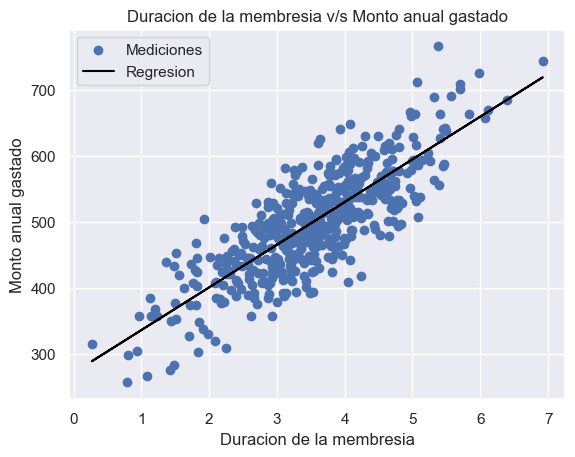

In [87]:
plt.scatter(df_m['Duracion de la membresia'],df_m['Monto anual gastado'], label='Mediciones')
plt.plot(X,lm.predict(X), color='black', label='Regresion') 
plt.xlabel('Duracion de la membresia')
plt.ylabel('Monto anual gastado')
plt.title('Duracion de la membresia v/s Monto anual gastado')
plt.legend(loc=0)

#### Métricas de Error

In [88]:
from sklearn import metrics

# Mean Absolute Error
metrics.mean_absolute_error(y_test,y_pred)

37.83623390033241

In [89]:
# Mean Squared Error
metrics.mean_squared_error(y_test,y_pred)

2162.111632776424

In [90]:
# Root Medium Squared Error
metrics.mean_squared_error(y_test,y_pred)**.5

46.49851215658867

Indicador R-cuadrado

In [91]:
# R-Squared
lm.score(X_test,y_test)

0.5633624502240147

#### Análisis de Residuales

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_5948\2126161201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_test, bins=20)


<Axes: ylabel='Density'>

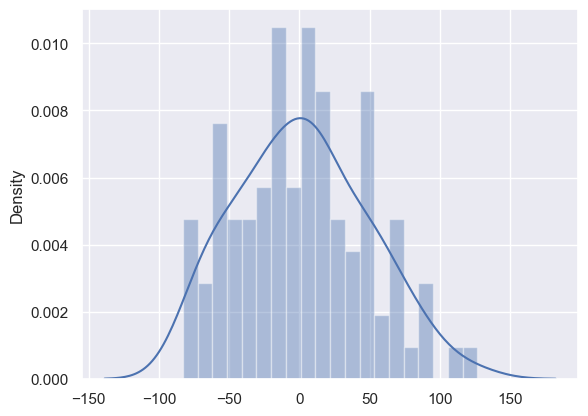

In [92]:
sns.distplot(y_pred-y_test, bins=20)

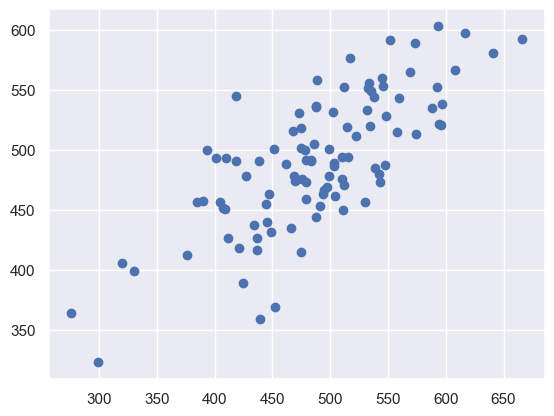

In [93]:
plt.scatter(y_test,y_pred)

Solo se explica un 56% de la variabilidad de las varianzas. Algunos errores se salen de la escala de la normalidad. Habría que ver que otra variable tiene mas peso en el modelo.

### Hipótesis de Trabajo N°2

Se va a establecer la hipotesis de que existe una relación lineal en el monto gastado anual, la duracion de la membresia, Duracion promedio de la sesion y Tiempo en la App.

#### Formulación del Modelo

In [96]:
df_m = df[['Duracion de la membresia','Duracion promedio de la sesion','Tiempo en la App','Monto anual gastado']]
X=df_m[['Duracion de la membresia','Duracion promedio de la sesion','Tiempo en la App']]
y=df_m[['Monto anual gastado']]
df_m.head()

,Duracion de la membresia,Duracion promedio de la sesion,Tiempo en la App,Monto anual gastado
0,4.082621,34.497268,12.655651,587.951054
1,2.664034,31.926272,11.109461,392.204933
2,4.104543,33.000915,11.330278,487.547505
3,3.120179,34.305557,13.717514,581.852344
4,4.446308,33.330673,12.795189,599.406092


In [97]:
X.head(2)

,Duracion de la membresia,Duracion promedio de la sesion,Tiempo en la App
0,4.082621,34.497268,12.655651
1,2.664034,31.926272,11.109461


### Validación Cruzada

In [98]:
import sklearn

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
print(X_train.shape)

(400, 3)


In [102]:
print(X_test.shape)

(100, 3)


### Entrenamiento del modelo lineal

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [105]:
# coeficientes ajustados
lm.coef_

array([[61.88227895, 25.59910468, 38.81121741]])

In [106]:
# intercepto 
lm.intercept_

array([-1033.12079801])

In [115]:
# monto anual gastado = a? + b? * duracion membresia
duracion_membresia=4
Duracion_sesion=35
Tiempo_app=12

monto_anual= -1033.12079801+61.88227895*duracion_membresia+25.59910468*Duracion_sesion+38.81121741*Tiempo_app

In [116]:
monto_anual

576.1115905099998

#### Haciendo algunas predicciones

In [120]:
# predicciones sobre un valor
p1=[[4,35,12]]
lm.predict(p1)

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[576.11159062]])

In [117]:
y_pred=lm.predict(X_test)

In [118]:
y_pred[:5]

array([[402.18887221],
       [542.54472263],
       [426.23774751],
       [501.88979068],
       [409.30936652]])

In [119]:
y_test[:5]

,Monto anual gastado
361,401.033135
73,534.777188
374,418.602742
155,503.978379
104,410.069611


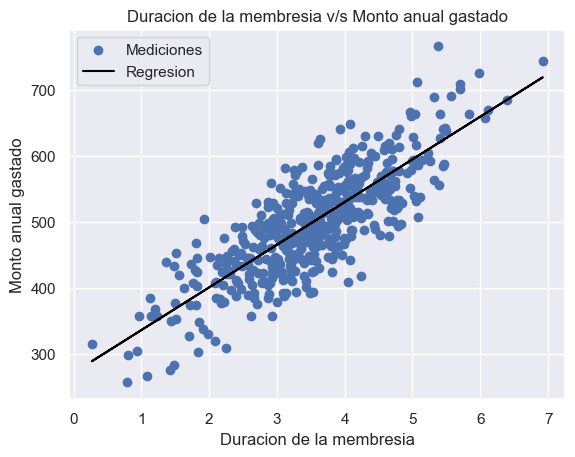

In [87]:
plt.scatter(df_m['Duracion de la membresia'],df_m['Monto anual gastado'], label='Mediciones')
plt.plot(X,lm.predict(X), color='black', label='Regresion') 
plt.xlabel('Duracion de la membresia')
plt.ylabel('Monto anual gastado')
plt.title('Duracion de la membresia v/s Monto anual gastado')
plt.legend(loc=0)

#### Métricas de Error

In [121]:
from sklearn import metrics

# Mean Absolute Error
metrics.mean_absolute_error(y_test,y_pred)

8.583564848964622

In [122]:
# Mean Squared Error
metrics.mean_squared_error(y_test,y_pred)

110.32288587780593

In [123]:
# Root Medium Squared Error
metrics.mean_squared_error(y_test,y_pred)**.5

10.503470182649444

Indicador R-cuadrado

In [124]:
# R-Squared
lm.score(X_test,y_test)

0.9777203388374341

#### Análisis de Residuales

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_5948\2126161201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_test, bins=20)


<Axes: ylabel='Density'>

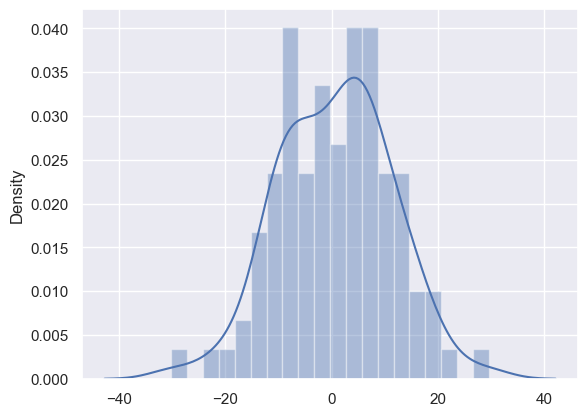

In [125]:
sns.distplot(y_pred-y_test, bins=20)

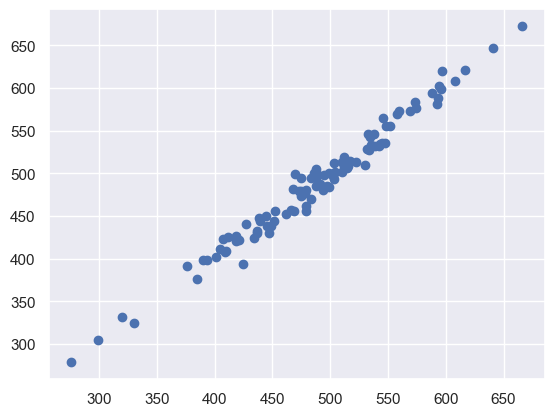

In [126]:
plt.scatter(y_test,y_pred)

Explica un 97.7% de la variabilidad de las varianzas.Es un muy buen modelo predictor.